## Singular Value Decomposition (SVD)
---
    - Singular Value Decomposition.
    - Properties of SVD
    - Pseudo-inverse.
    - Inconsistent and Underdetermined Systems
    - Applications: Image compression


In [2]:
#IMPORT
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

#from ipywidgets import interact, interactive, fixed, interact_manual
#import ipywidgets as widgets

## Set a seed for the random number generator
np.random.seed(100)

---

### The Geometry os SVD: 
#### Decomposition into a sequence of rotation, scaling, and rotation transformations.

<img src="https://i.stack.imgur.com/IM6Fn.png" width="70%">

[Image Source](https://i.stack.imgur.com/IM6Fn.png)

**Theorem: Singular Value Decomposition**
<div class="alert alert-block alert-info">
Any arbitrary matrix $A \in \mathcal{C}^{m \times n}$ can be factored as 
$$ A = U\Sigma V^H$$
where $U$ is an $m \times m$ unitary matrix, $\Sigma$ is an $m \times n$ diagonal matrix, and $V$ is an $n \times n$ unitary matrix. 
</div>

> - The diagonal matrix $\Sigma$ for matrix $A$ of rank $r$ could be given by
$$\large
D = \textrm{diag}(\sigma_1, \sigma_2, \cdots, \sigma_r, 0, \cdots, 0)_{m \times n}
$$
where $0 \leq \sigma_i$ are called singular values of $A$ and are ordered as $\sigma_1 \geq \sigma_2 \geq \cdots \geq \sigma_r \geq 0$.
<br>

> - The columns of $U$ are called <font color=blue>left singular vectors</font> and $V$ are called <font color=blue>right singular vectors</font> of $A$.

<br>
---

##### When $m > n$
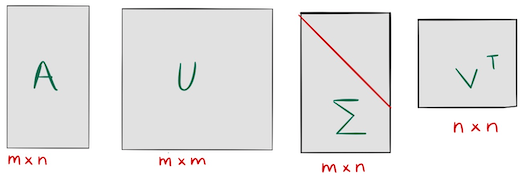

---
##### When $m < n$
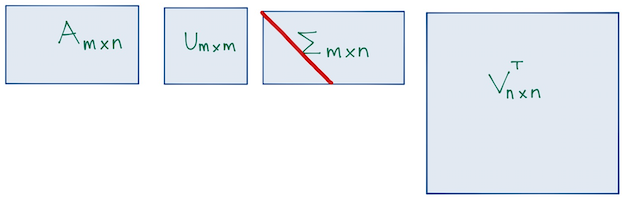

### Economic (or Reduced) SVD

<div class="alert alert-block alert-info">
Any arbitrary matrix $A \in \mathcal{C}^{m \times n}$ that has rank $r$ can be factored as 
$$A = \tilde{U}\Sigma_r \tilde{V}^H$$
where $\tilde{U}$ is an $m \times r$  matrix having orthonormal columns, $\Sigma_r$ is an $r \times r$ diagonal matrix, and $\tilde{V}$ is an $n \times r$  matrix having orthonormal columns. 
</div>
<div class="alert alert-block alert-danger">
Note that $\tilde{U}$ and $\tilde{V}$ are not orthonormal matrices because they are not square matrices.
</div>

>- The diagonal matrix $\Sigma_r$ for matrix could be given by
$$
\Sigma_r  = \textrm{diag}(\sigma_1, \sigma_2, \cdots, \sigma_r)_{r \times r}
$$

#### Outer Product Form of Economic SVD 

$$
A = \sigma_1u_1 v_1^H +  \sigma_2 u_2 v_2^H + \cdots +  \sigma_r u_r v_r^H =  \ \sum_{i=1}^{r} \sigma_i u_i v_i^H
$$
---


**Properties of SVD**
> - $\sigma_i^2$ are eigenvalues of $A^*A$  having associated eigenvectors $v_i$.


> - $\sigma_i^2$ are eigenvalues of $AA^*$  having associated eigenvectors $u_i$.


> - $\sigma_i$ are taken to be **nonnegative and ordered** as: $\sigma_1 \geq \sigma_2 \geq \cdots \geq \sigma_r \geq 0 \geq \cdots$.


> - Columns of $U$ are called **left singular vectors** of $A$ and columns of $V$ are called **right singular vectors** of $A$.



### Application: Pseudo-inverse (Moore-Penrose Inverse)

The pseudo-inverse of a rectangular matrix $A$ of rank $r$, whose SVD is given by $A = U\Sigma_r V^H$, is a unique rectangular matrix 

$$\large 
A^+ = V \Sigma_r^+ U^H \ \textrm{where}\ 
\Sigma_r^+ = \textrm{diag}(\sigma_1^{-1}, \sigma_2^{-1}, \cdots, \sigma_r^{-1}, 0, \cdots, 0)
$$


### Application: Inconsistent and Underdetermined Systems

Given a linear system of equations $Ax = b$ where $A$ is a rectangular matrix of order $m \times n$, <font color = blue>a  minimal solution </font> could be defined each of the following cases.

>- Consistent with unique solution $x$: The minimal solution is $x$.


>- Consistent with a set of solutions : The minimal solution is the one with smallest $||x||_2$.


>- Inconsistent with unique least-square solution $x$: The minimal solution is $x$.


>- Inconsistent with a set of least-square solutions: The minimal solution is the one with smallest $||x||_2$.


The **minimal solution** of the equation $A x = b$ is given by the pseudo-inverse as
$$
x = A^+b.
$$


### Application: Fundamental Subspaces
---
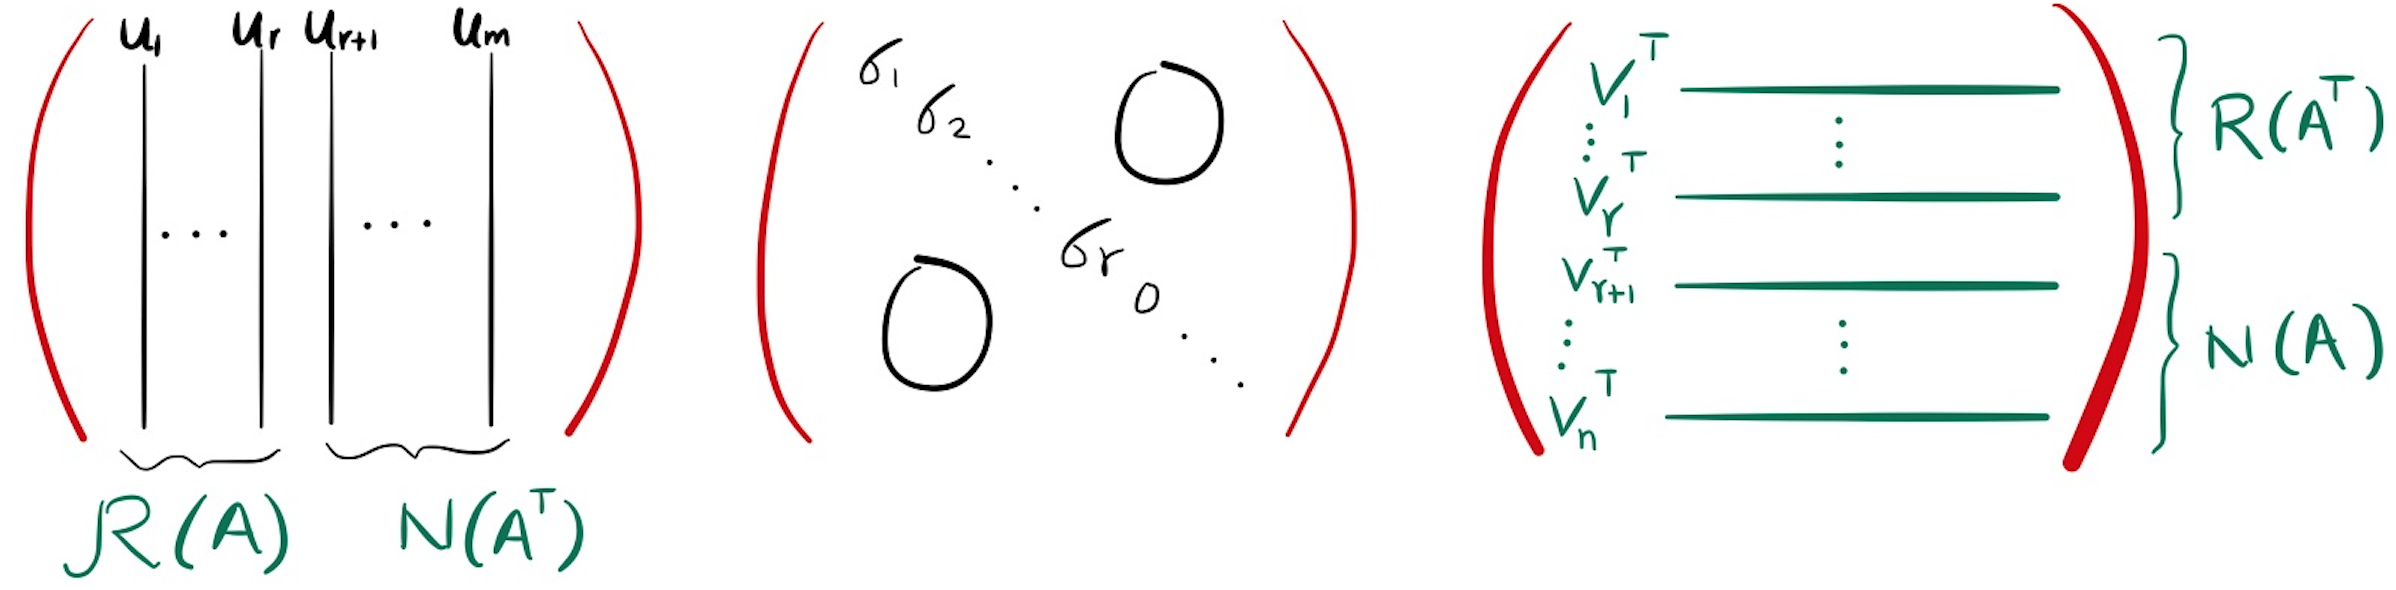
**Properties of SVD**
- Rank of $A$ is $r$, number of non-zero singular values.
- $\{ u_{1},u_{2},\cdots,u_{r}, \}$ is an orthonormal base for the range or column space of $A$.

- $\{ u_{r+1},u_{r+2},\cdots,u_{n}, \}$ is an orthonormal base for the null space of $A^T$.

- $\{ v_{1},v_{2},\cdots,v_{r}, \}$ is an orthonormal base for the row-space of $A$.

- $\{ v_{r+1},v_{r+2},\cdots,v_{n}, \}$ is an orthonormal base for the null space of $A$.

- $\| A\|_2 = \textrm{max}_{1 \leq i \leq n} |\sigma_i| = \sigma_1$.



---

#### SVD in NumPy

In [3]:
# Create a random matrix and find its SVD
A = np.random.randn(4,5)
U, S, V = np.linalg.svd(A)

In [4]:
U

array([[ 0.89801417, -0.26982127,  0.32969682,  0.10985004],
       [-0.38990677, -0.27131363,  0.6380585 ,  0.60600576],
       [ 0.01699912, -0.57829874, -0.6730767 ,  0.46070527],
       [ 0.20311152,  0.72052478, -0.17649113,  0.6390936 ]])

In [6]:
S

array([2.52164467, 2.19016857, 0.72701743, 0.25717533])

In [7]:
V

array([[-0.71413898,  0.04797688,  0.6550842 , -0.09038154,  0.22449854],
       [ 0.23845424, -0.3592996 ,  0.48336186, -0.30524764, -0.69801759],
       [ 0.10718383,  0.0756159 , -0.12590131, -0.93066608,  0.31749546],
       [-0.61567399,  0.12685444, -0.51545048, -0.17983682, -0.55391607],
       [-0.20640311, -0.92021313, -0.2359781 ,  0.0132066 ,  0.23397751]])

### Application: Reduced Rank approximation
---
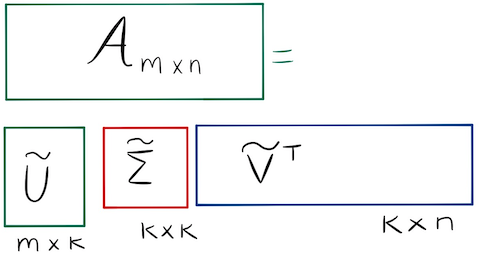


#### Truncated SVD
---
$$\LARGE
A \approx U_{(k)} \Sigma_{(k)} V^T_{(k)} =   \sum_{i=1}^{k} \sigma_i u_i v_i^T
$$
#### Eckart-Young Theorem
<div class="alert alert-block alert-info">
Assume that the matrix $A$ has a rank $r  > k$. Then the solution of the matrix approximation problems
<div style="margin:auto;width:400px;padding:20px;border: 1px solid green;">
$$ \textrm{min}_{rank(X) = k} \|A-X\|^2_F$$
</div>
is given by $X = A_{(k)}:=U_{(k)} \Sigma_{(k)} V^T_{(k)}$.

The minimum value is 
    $$ \|A - A_{(k)}\|_F^2 = \sigma_{k+1}^2+\cdots +\sigma_r^2.$$
    </div>

##### A discussion on Shatten's p-norm.

[A comprehensive review of all norms](http://fourier.eng.hmc.edu/e161/lectures/algebra/node12.html#:~:text=Induced%20or%20operator%20norms%20of%20a%20matrix%20is,is%20the%20least%20upper%20bound%20of%20the%20function.)

#### Image compression using SVD

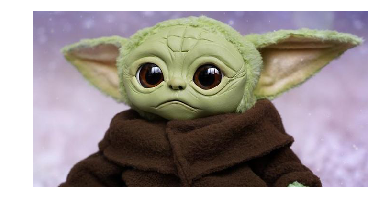

Original order of the image tensor: (368, 700, 3)


In [144]:
## Following code has been copied from Week 1 notebook
pix = mpimg.imread("./images/BabyYodaDoll.jpg") # OR BabyYodaDoll.jpg, BabyYodaXmas

plt.axis('off') # you do not want to see the axes.
plt.imshow(pix)
plt.show()
dim = pix.shape
print ("Original order of the image tensor:", dim)

In [141]:
## SVD of the red, green and blue channels separately
pix_rgb = pix/255.0;
U0,S0,V0 = np.linalg.svd(pix_rgb[...,0]);
U1,S1,V1 = np.linalg.svd(pix_rgb[...,1]);
U2,S2,V2 = np.linalg.svd(pix_rgb[...,2]);

In [35]:
S0.shape

(368,)

In [142]:
## Reconstruction of the image from fewer components from the SVD
pix_compressed = np.zeros_like(pix_rgb);
k=100
pix_compressed[...,0] = np.dot(U0[:,:k], V0[:k,:]*S0[:k].reshape(k,1));
pix_compressed[...,1] = np.dot(U1[:,:k], V1[:k,:]*S1[:k].reshape(k,1));
pix_compressed[...,2] = np.dot(U2[:,:k], V2[:k,:]*S2[:k].reshape(k,1));

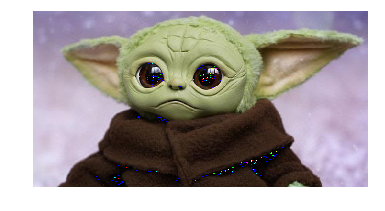

In [143]:
## Display the reconstructed images
plt.axis('off')
plt.imshow(pix_compressed)
plt.show()

Order of the gray-scale image matrix: (368, 700)


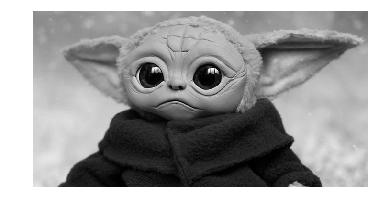

In [145]:
## Image compression after conversion to a gray-scale image
color_weight = [0.3, 0.9, 0.5];
pix_gray = np.dot(pix[...,:3], color_weight) # Note conversion to gray-scale is not unique
print ("Order of the gray-scale image matrix:", pix_gray.shape)
plt.axis('off')
plt.imshow(pix_gray, cmap='gray')
plt.show()

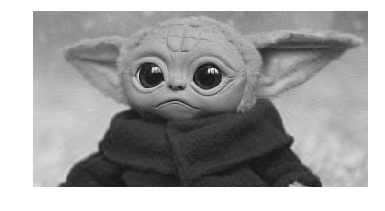

In [146]:
## SVD of the matrix
U,S,V = np.linalg.svd(pix_gray, full_matrices=False);
k=50
pix_gray_compressed = np.dot(U[:,:k], V[:k,:]*S[:k].reshape(k,1));
plt.axis('off')
plt.imshow(pix_gray_compressed, cmap='gray')
plt.show()

In [147]:
## A function for the reconstruction of images for different k values. You need to run the SVD 
def show_gray_image(k):
    pix_gray_compressed = np.dot(U[:,:k], V[:k,:]*S[:k].reshape(k,1))
    plt.axis('off')
    plt.imshow(pix_gray_compressed, cmap='gray')
    plt.show()

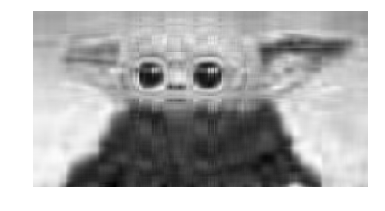

In [148]:
show_gray_image(10)

In [149]:
interact(show_gray_image, k=widgets.IntSlider(min=10, max=200, step=15));